# Importing libraries

In [6]:
from PIL import Image
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

# Connect to Google Drive (if needed)

In [1]:
# Подключить к google colab содержимое вашего google диск
from google.colab import drive
# This will prompt for authorization.
drive.mount('/content/drive')

Mounted at /content/drive


# NSL-KDD dataset

## Download data

In [2]:
%%time
!tar -xzvf "/content/drive/MyDrive/Master/MW/datasets/NSL-KDD/images/NSL_KDD_image_train.tar.gz"

Выходные данные были обрезаны до нескольких последних строк (5000).
content/NSL_KDD_image_train/normal/81923.jpg
content/NSL_KDD_image_train/normal/122453.jpg
content/NSL_KDD_image_train/normal/83962.jpg
content/NSL_KDD_image_train/normal/54609.jpg
content/NSL_KDD_image_train/normal/49944.jpg
content/NSL_KDD_image_train/normal/87053.jpg
content/NSL_KDD_image_train/normal/8004.jpg
content/NSL_KDD_image_train/normal/105.jpg
content/NSL_KDD_image_train/normal/100667.jpg
content/NSL_KDD_image_train/normal/99119.jpg
content/NSL_KDD_image_train/normal/103539.jpg
content/NSL_KDD_image_train/normal/116458.jpg
content/NSL_KDD_image_train/normal/79508.jpg
content/NSL_KDD_image_train/normal/70123.jpg
content/NSL_KDD_image_train/normal/82329.jpg
content/NSL_KDD_image_train/normal/71792.jpg
content/NSL_KDD_image_train/normal/17658.jpg
content/NSL_KDD_image_train/normal/22060.jpg
content/NSL_KDD_image_train/normal/14407.jpg
content/NSL_KDD_image_train/normal/34152.jpg
content/NSL_KDD_image_train/nor

## Normalize

Get image

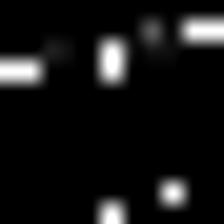

In [24]:
img_pil = Image.open("content/NSL_KDD_image_train/attack/100003.jpg")

img_pil

Pixels distribution

Text(0.5, 1.0, 'distribution of pixels')

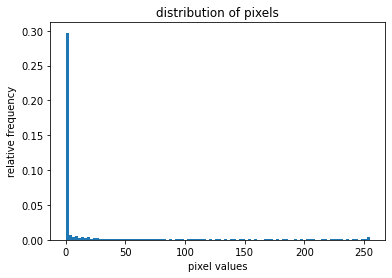

In [25]:
plt.hist(np.array(img_pil).ravel(), bins=100, density=True);
plt.xlabel("pixel values")
plt.ylabel("relative frequency")
plt.title("distribution of pixels")

ToTensor()

Text(0.5, 1.0, 'distribution of pixels')

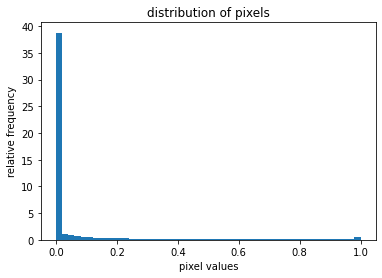

In [26]:
# define custom transform function
transform = transforms.Compose([
    transforms.ToTensor()
])
  
# transform the pIL image to tensor 
# image
img_tr = transform(img_pil)
  
# Convert tensor image to numpy array
img_np = np.array(img_tr)
  
# plot the pixel values
plt.hist(img_np.ravel(), bins=50, density=True)
plt.xlabel("pixel values")
plt.ylabel("relative frequency")
plt.title("distribution of pixels")

Calculate mean and std

In [27]:
# get tensor image
img_tr = transform(img_pil)
  
# calculate mean and std
mean, std = img_tr.mean([1,2]), img_tr.std([1,2])
  
# print mean and std
print("mean and std before normalize:")
print("Mean of the image:", mean)
print("Std of the image:", std)

mean and std before normalize:
Mean of the image: tensor([0.0789, 0.0789, 0.0789])
Std of the image: tensor([0.2073, 0.2073, 0.2073])


Normalize with calculated mean and std

Text(0.5, 1.0, 'distribution of pixels')

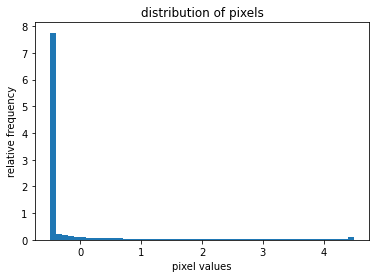

In [28]:
# define custom transform
# here we are using our calculated
# mean & std
transform_norm = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(0.1, 0.2)
])
  
# get normalized image
img_normalized = transform_norm(img_pil)
  
# convert normalized image to numpy
# array
img_np = np.array(img_normalized)
  
# plot the pixel values
plt.hist(img_np.ravel(), bins=50, density=True)
plt.xlabel("pixel values")
plt.ylabel("relative frequency")
plt.title("distribution of pixels")